<a href="https://colab.research.google.com/github/VladousSparrowous/OpenML/blob/main/MLforYandex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from typing import Optional, List

import sklearn.base

seed = 24

In [ ]:
data = pd.read_csv('/content/sample_data/ames_iowa.csv')

data.sample(5)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1520,Two_Story_1945_and_Older,Residential_High_Density,55,8525,Pave,No_Alley_Access,Regular,Bnk,AllPub,Inside,...,No_Fence,NaN,0,11,2008,WD,Abnorml,130000,-93.647024,42.019272
117,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,80,9600,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2010,WD,Normal,142250,-93.626137,42.046574
2001,Two_Story_1945_and_Older,Residential_Medium_Density,60,10800,Pave,Gravel,Regular,Bnk,AllPub,Inside,...,No_Fence,NaN,0,7,2007,WD,Normal,159500,-93.608678,42.026089
1081,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,0,3940,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,5,2008,WD,Normal,219990,-93.640958,42.062299
1234,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,7390,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,7,2008,WD,Normal,135000,-93.617179,42.042373


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

In [ ]:
from sklearn.model_selection import train_test_split

target_column = "Sale_Price"
np.random.seed(seed)

test_size = 0.2
data_train, data_test, Y_train, Y_test = train_test_split(
    data[data.columns.drop("Sale_Price")],
    np.array(data["Sale_Price"]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {data_train.shape} {Y_train.shape}")
print(f"Test : {data_test.shape} {Y_test.shape}")

Train : (2344, 80) (2344,)
Test : (586, 80) (586,)


In [ ]:
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]

continuous_columns.remove(target_column)

print(f"Continuous : {len(continuous_columns)}, Categorical : {len(categorical_columns)}")
print(continuous_columns)

Continuous : 34, Categorical : 46
['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Longitude', 'Latitude']


In [ ]:
# @title предобработка

from sklearn.preprocessing import StandardScaler  # нормализация фичей
from sklearn.base import TransformerMixin

class BaseDataPreprocessor(TransformerMixin):

    def __init__(self, needed_columns: Optional[List[str]]=None):
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.scaler = StandardScaler()
        self.needed_columns = needed_columns.copy()


    def fit(self, data, *args):
        """
        Prepares the class for future transformations
        :param data: pd.DataFrame with all available columns
        :return: self
        """
        fit_data = data.copy()

        if self.needed_columns != None:
          fit_data = fit_data[self.needed_columns]

        self.scaler.fit(fit_data)

        return self

    def transform(self, data: pd.DataFrame) -> np.array:
        """
        Transforms features so that they can be fed into the regressors
        :param data: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        trans_data = data.copy()

        if self.needed_columns != None:
          trans_data = trans_data[self.needed_columns]

        return np.array(self.scaler.transform(trans_data))

In [ ]:
preprocessor = BaseDataPreprocessor(needed_columns=continuous_columns)

X_train = preprocessor.fit_transform(data_train)
print(X_train)
print('\n')
X_test = preprocessor.transform(data_test)
print(X_test)

[[ 0.72781797  0.10999732  0.65825008 ...  0.91897402  1.59953221
  -2.10399441]
 [ 0.28278084  0.3792301   1.09413674 ...  1.67878887 -0.03026421
   1.46544646]
 [ 0.63881055 -0.1507842  -0.4147017  ... -1.36047053  1.4104223
   0.21280896]
 ...
 [ 0.52013398  0.4287303  -0.71646938 ... -0.60065568  0.65006975
  -0.71551757]
 [ 0.22344256  0.09261189 -0.4147017  ...  0.91897402 -0.82561363
  -0.89443458]
 [ 0.22344256 -0.36327285 -0.14646375 ...  0.91897402  0.69254025
   0.78026581]]


[[ 0.2531117   0.42691932  1.09413674 ...  0.15915917 -1.85699633
   0.17491808]
 [-1.70505166  0.41629488  0.49060136 ...  0.91897402 -0.06109778
  -1.30850436]
 [ 0.07509685 -0.12253287 -1.89001039 ...  0.15915917  0.69506797
  -0.34550822]
 ...
 [ 0.66847969  0.38937161 -0.07940427 ... -1.36047053  1.67720305
  -2.34193166]
 [ 0.37178827 -0.21235762  0.28942291 ...  1.67878887 -1.63270955
   0.00413614]
 [ 0.16410428 -0.27574202  1.06060699 ... -1.36047053  0.12096894
   1.39070206]]


In [ ]:
print(len(X_train))
print(len(X_train[0]))

2344
34


In [ ]:
# @title Линейная регрессия

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Regression = LinearRegression()
Regression.fit(X_train, Y_train)
answer_LR = Regression.predict(X_test)
print(mean_absolute_error(Y_test, answer_LR))

23822.696518655215


In [ ]:
# @title линейная регрессия с L2 регуляризацией

from sklearn.linear_model import Ridge

Regression = Ridge(25)
Regression.fit(X_train, Y_train)
answer_L2 = Regression.predict(X_test)
print(mean_absolute_error(Y_test, answer_L2))

23812.476963044173


In [ ]:
# @title линейная регрессия с L1 регуляризацией

from sklearn.linear_model import Lasso

Regression = Lasso(1000)
Regression.fit(X_train, Y_train)
answer_L1 = Regression.predict(X_test)
print(mean_absolute_error(Y_test, answer_L1))

23743.597350572974


In [ ]:
# @title метрика

def root_mean_squared_logarithmic_error(y_true, y_pred, a_min=1.):
  sum = 0
  N = 0

  for y_i, y_i_predict in zip(y_true, y_pred):
    if y_i < 0:
      raise ValueError
    sum += (np.log(y_i) - np.log(max(y_i_predict, a_min))) ** 2
    N += 1
  return np.sqrt(sum / N)

print(root_mean_squared_logarithmic_error(Y_test, answer_LR))
print(root_mean_squared_logarithmic_error(Y_test, answer_L2))
print(root_mean_squared_logarithmic_error(Y_test, answer_L1))

0.19504167069334188
0.1942464535080755
0.1903084476776101


In [ ]:
# @title анализ таргета

import matplotlib.pyplot as plt

def plot_target_distribution(Y_train, Y_test, ax, n_bins=20):
    ax.hist(Y_train, bins=n_bins, label="train", color="red", alpha=0.3, density=True)
    ax.hist(Y_test, bins=n_bins, label="test", color="blue", alpha=0.3, density=True)

    ax.legend()
    ax.set_xlabel("Value")
    ax.set_ylabel("Probability")


def plot_both_distributions(Y_train, Y_test):
    fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

    plot_target_distribution(Y_train, Y_test, ax=ax0)
    ax0.set_title("Standard")

    plot_target_distribution(np.log(Y_train), np.log(Y_test), ax=ax1)
    ax1.set_title("Logarithmic")

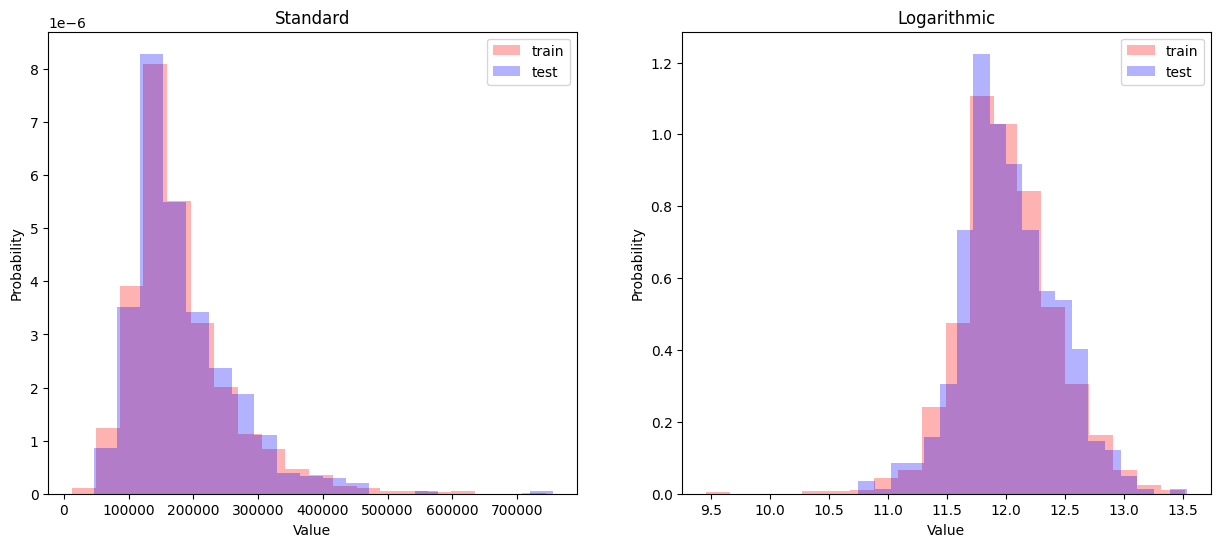

In [ ]:
plot_both_distributions(Y_train, Y_test)

In [ ]:
# @title Ridge на логарифмированных данных

from sklearn.base import RegressorMixin

class ExponentialLinearRegression(RegressorMixin):

    def __init__(self, *args, **kwargs):
        self.params = kwargs
        self.Ridge_Reg = Ridge(*args, **kwargs)

    def fit(self, X, Y):
        log_Y = [np.log(y) for y in Y]
        self.Ridge_Reg.fit(X, log_Y)
        return self

    def predict(self, X):
        answer = [np.exp(y) for y in self.Ridge_Reg.predict(X)]
        return np.array(answer)

    def get_params(self, deep=True):
        params = self.Ridge_Reg.get_params(deep=deep)
        return params

    def set_params(self, **params):
        self.Ridge_Reg.set_params(**params)
        return self


In [ ]:
classic_regressor = Ridge()
exponential_regressor = ExponentialLinearRegression()
classic_regressor.fit(X_train, Y_train)
exponential_regressor.fit(X_train, Y_train)

classic_prediction = classic_regressor.predict(X_test)
exponential_prediction = exponential_regressor.predict(X_test)

print(f"MAE  : Classic : {mean_absolute_error(Y_test, classic_prediction)}  Exponential : {mean_absolute_error(Y_test, exponential_prediction)}")
print(f"MSLE : Classic : {root_mean_squared_logarithmic_error(Y_test, classic_prediction)} Exponential : {root_mean_squared_logarithmic_error(Y_test, exponential_prediction)}")

MAE  : Classic : 23821.97776100681  Exponential : 26818.699786544395
MSLE : Classic : 0.19500621233281323 Exponential : 0.2160102771618544


In [ ]:
# @title CrossValidation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

cv=KFold(n_splits=5, shuffle=True, random_state=42)
X_cv = np.vstack([X_train, X_test])
Y_cv = np.concatenate([Y_train, Y_test])

print(cross_val_score(classic_regressor, X_cv, Y_cv, scoring=make_scorer(mean_absolute_error), cv=cv).mean())
print(cross_val_score(exponential_regressor, X_cv, Y_cv, scoring=make_scorer(mean_absolute_error), cv=cv).mean())


23225.28194530271
21166.68153775273


In [ ]:
# @title нахождение оптимального гиперпараметра с помощью GridSearchCV

from sklearn.model_selection import GridSearchCV

rgr = GridSearchCV(exponential_regressor, param_grid={'alpha': np.logspace(-3, 3, num=7, base=10.)}, scoring=make_scorer(root_mean_squared_logarithmic_error, greater_is_better=False), cv=5)
result = rgr.fit(X_train, Y_train).cv_results_
print(result, '\n')
number = list(result['rank_test_score']).index(1)
print('answer: ', result['params'][number], f"number: {number + 1}")

{'mean_fit_time': array([0.01734486, 0.0198525 , 0.07675843, 0.05429974, 0.02154331,
       0.01817169, 0.04896412]), 'std_fit_time': array([0.00786263, 0.00592455, 0.05166878, 0.03883043, 0.00837913,
       0.00807643, 0.04826434]), 'mean_score_time': array([0.00416064, 0.0041584 , 0.00904875, 0.00625491, 0.00943794,
       0.01029472, 0.00576739]), 'std_score_time': array([5.66102311e-05, 5.58831179e-05, 3.90059960e-03, 2.79895163e-03,
       4.31988593e-03, 1.14894044e-03, 3.00108927e-03]), 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
             mask=[False, False, False, False, False, False, False],
       fill_value=1e+20), 'params': [{'alpha': np.float64(0.001)}, {'alpha': np.float64(0.01)}, {'alpha': np.float64(0.1)}, {'alpha': np.float64(1.0)}, {'alpha': np.float64(10.0)}, {'alpha': np.float64(100.0)}, {'alpha': np.float64(1000.0)}], 'split0_test_score': array([-0.17408353, -0.17408362, -0.17408446, -0.17409295, -0.17418306,
       -0.1753425

In [ ]:
# @title самописная линейная регрессия
from sklearn.utils import shuffle

class SGDLinearRegressor(RegressorMixin):
    def __init__(self,
                 lr=0.01, regularization=1., delta_converged=1e-5, max_steps=1000,
                 batch_size=64):

        self.lr = lr
        self.regularization = regularization
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        self.batch_size = batch_size

        self.W = None
        self.b = None

    def fit(self, X_fit, Y_fit):

        W_0 = np.full(len(X_fit[0]), 0)
        b_0 = 0
        counter = 0

        while True:
            idx = np.random.choice(np.arange(len(X_fit)), self.batch_size, replace=False)
            counter += 1
            X = X_fit[idx]
            Y = Y_fit[idx]
            Y_p = np.dot(X, W_0) + b_0
            L_b = 2 * np.sum(Y_p - Y) / self.batch_size
            L_w = 2 * np.dot(X.T, (Y_p - Y)) / self.batch_size + 2 * self.regularization * W_0

            W_0 = W_0 - self.lr * L_w
            b_0 = b_0 - self.lr * L_b

            if np.linalg.norm(self.lr * L_w) < self.delta_converged or counter == self.max_steps:
                self.b = b_0
                self.W = W_0
                break

        return self

    def predict(self, X):
        answer = np.dot(X, self.W) + self.b
        return np.array(answer)

In [ ]:
model = SGDLinearRegressor()
model.fit(X_train, Y_train)

prediction = model.predict(X_test)
print(Y_test.shape, prediction.shape)
print("MAE : ", mean_absolute_error(Y_test, prediction))
print("Mean log : ", root_mean_squared_logarithmic_error(Y_test, prediction))

(586,) (586,)
MAE :  25964.567465400323
Mean log :  0.18971799715261356


In [ ]:
# @title OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

interesting_columns = ["Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning"]

class OneHotPreprocessor(BaseDataPreprocessor):

    def __init__(self, **kwargs):
        super().__init__(kwargs['needed_columns'])
        self.enc = OneHotEncoder(handle_unknown='ignore', drop='first')
        self.interesting_columns = kwargs['interesting_columns']
        ## <YOUR CODE HERE>

    def fit(self, data, *args):
        ## <YOUR CODE HERE>
        super().fit(data)
        if self.interesting_columns != None:
            self.enc.fit(data[self.interesting_columns])
        return self
    def transform(self, data):
        ## <YOUR CODE HERE>
        cont = super().transform(data)

        if self.interesting_columns != None:
          cat = self.enc.transform(data[self.interesting_columns]).toarray()
          cont = np.hstack((cont, cat))

        return cont

In [ ]:
preprocessor = OneHotPreprocessor(needed_columns=continuous_columns,
                                  interesting_columns=interesting_columns)

X_train = preprocessor.fit_transform(data_train)
print(X_train)
print('\n')
X_test = preprocessor.transform(data_test)
print(X_test)

[[ 0.72781797  0.10999732  0.65825008 ...  0.          1.
   0.        ]
 [ 0.28278084  0.3792301   1.09413674 ...  0.          1.
   0.        ]
 [ 0.63881055 -0.1507842  -0.4147017  ...  0.          1.
   0.        ]
 ...
 [ 0.52013398  0.4287303  -0.71646938 ...  0.          0.
   1.        ]
 [ 0.22344256  0.09261189 -0.4147017  ...  0.          1.
   0.        ]
 [ 0.22344256 -0.36327285 -0.14646375 ...  0.          1.
   0.        ]]


[[ 0.2531117   0.42691932  1.09413674 ...  0.          1.
   0.        ]
 [-1.70505166  0.41629488  0.49060136 ...  0.          1.
   0.        ]
 [ 0.07509685 -0.12253287 -1.89001039 ...  0.          1.
   0.        ]
 ...
 [ 0.66847969  0.38937161 -0.07940427 ...  0.          1.
   0.        ]
 [ 0.37178827 -0.21235762  0.28942291 ...  0.          1.
   0.        ]
 [ 0.16410428 -0.27574202  1.06060699 ...  0.          1.
   0.        ]]


In [ ]:
# @title модель-пайплайн
from sklearn.pipeline import Pipeline

def make_ultimate_pipeline():
    pipe = Pipeline([('preprocessor', OneHotPreprocessor(needed_columns=continuous_columns,
                                                         interesting_columns=interesting_columns)),
                     ('lin_reg_L2', Ridge())])
    return pipe


In [ ]:
a = make_ultimate_pipeline()
print(a.fit(data_train, Y_train).score(data_test, Y_test))

0.6926464644540256
